# Run MCMC sampling
# Light minimal WITH geometry, fitting log(m_4), log(m_z)

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import numpy as np

from Likelihood import LEff
from mcmc_utils import light_minimal_mcmc

from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [26]:
hierarchy = 'light'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

selection = 'cut_based'
set_backend = True
reset_backend = False
n_samples = 10000

spec = 'minimal with geometry and logs'

In [7]:
this_dark_nus_mcmc = light_minimal_mcmc(hierarchy, D_or_M, title_addition=spec,
                                   distance=distance, smoothing_pars=smoothing_pars)
df = this_dark_nus_mcmc.provide_df(selection)

light majorana


In [8]:
ndim = 4
from ctau_utils import ctau_light
from const import alphaQED
def light_minimal_posterior_with_geometry_log_masses(parameters):
    '''Posterior in the light minimal model with no geometry: parameters = [log10_m4, log10_mz, log10_Vmu4, log10_epsilon]
       It uses global pars to speed up parallel computation'''
    if (parameters[0] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0])) or\
       (parameters[0] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1])) or\
       (parameters[1] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0])) or\
       (parameters[1] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1])) or\
       (parameters[0] <= parameters[1]) or\
       (parameters[2] <= np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_Vmu4)) or\
       (parameters[2] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_Vmu4)) or\
       (parameters[3] <= np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_epsilon)) or\
       (parameters[3] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_epsilon)):
        return -np.inf, -np.inf, -np.inf, -np.inf
    else:
        actual_m4 = 10**parameters[0]
        actual_mz = 10**parameters[1]
        actual_Vmu4 = 10**parameters[2]
        actual_Vmu4_alpha_epsilon2 = actual_Vmu4 * alphaQED * 10**(2*parameters[3])
        ctau = ctau_light(actual_m4, 
                          actual_mz, 
                          actual_Vmu4, 
                          D_or_M)
        this_mu = actual_Vmu4_alpha_epsilon2/this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2
        mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events(df=df,
                                                         m4mz=(actual_m4, actual_mz),
                                                         ctau=ctau,
                                                         mu=this_mu,
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
        return LEff(0, mu, sigma2), mu, sigma2, ctau

labels = ['log10_m4', 'log10_mz', 'log10_Vmu4', 'log10_epsilon']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [10]:
this_dark_nus_mcmc.set_posterior(light_minimal_posterior_with_geometry_log_masses, 
                                 ndim, 
                                 labels=labels)

In [28]:
n_walkers = ndim**2
with Pool() as pool:
    this_dark_nus_mcmc.initialise_mcmc(n_walkers, pool,
                                       set_backend=set_backend, reset_backend=reset_backend, 
                                       blobs_dtype=blobs_dtype, log_ms=True)
    this_dark_nus_mcmc.run_mcmc(n_samples)

  7%|▋         | 698/10000 [06:10<1:22:23,  1.88it/s]


OSError: Unable to create file (unable to open file: name = './posteriors/light_majorana_minimal_with_geometry_and_logs.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
N/50 = 0;
tau: [       nan 0.58391074        nan 0.64519527]
N/50 = 0;
tau: [1.32006298 1.21710151 1.11408955 1.03157858]
N/50 = 1;
tau: [2.32464397 2.54163538 2.36053133 2.50566629]
N/50 = 1;
tau: [5.12180436 5.53569379 5.33743592 5.30650077]
N/50 = 2;
tau: [ 9.80082552 11.15449721 10.69140295  9.08215241]
N/50 = 4;
tau: [16.68417898 18.05438705 17.80922365 18.82083284]
N/50 = 7;
tau: [31.53953427 32.63551182 28.36304623 33.67352452]
N/50 = 14;
tau: [55.13964506 46.04753928 50.70173332 44.37218019]
N/50 = 28;
tau: [69.27037294 60.98079802 62.8420241  90.75037262]
N/50 = 54;
tau: [ 99.51616201  91.29498867  79.8700346  106.82073489]
N/50 = 104;
tau: [121.17486526  95.59377135  97.41717819 108.8343765 ]


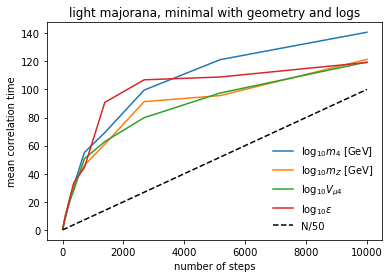

In [27]:
this_dark_nus_mcmc.compute_autocorrelation_time(store=True)

In [13]:
this_dark_nus_mcmc.get_samples(discard=0, thin=1)

N/50 = 2;
tau: [ 9.34521859 10.10421972  9.93559393  9.69757664]
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<Figure size 1080x504 with 5 Axes>,
 array([<AxesSubplot:ylabel='$\\log_{10}m_4$ [GeV]'>,
        <AxesSubplot:ylabel='$\\log_{10}m_Z$ [GeV]'>,
        <AxesSubplot:ylabel='$\\log_{10}V_{\\mu 4}$'>,
        <AxesSubplot:ylabel='$\\log_{10}\\epsilon$'>,
        <AxesSubplot:xlabel='step number', ylabel='log(p)'>], dtype=object))

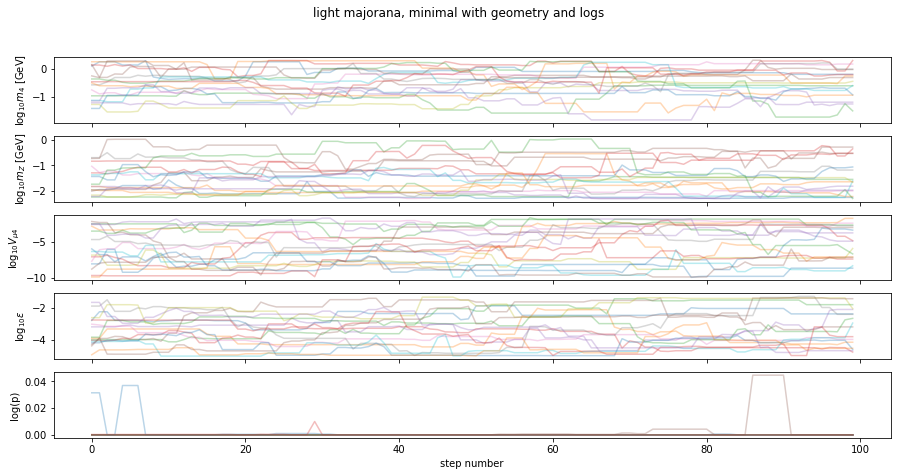

In [14]:
this_dark_nus_mcmc.plot_chains(store=True)

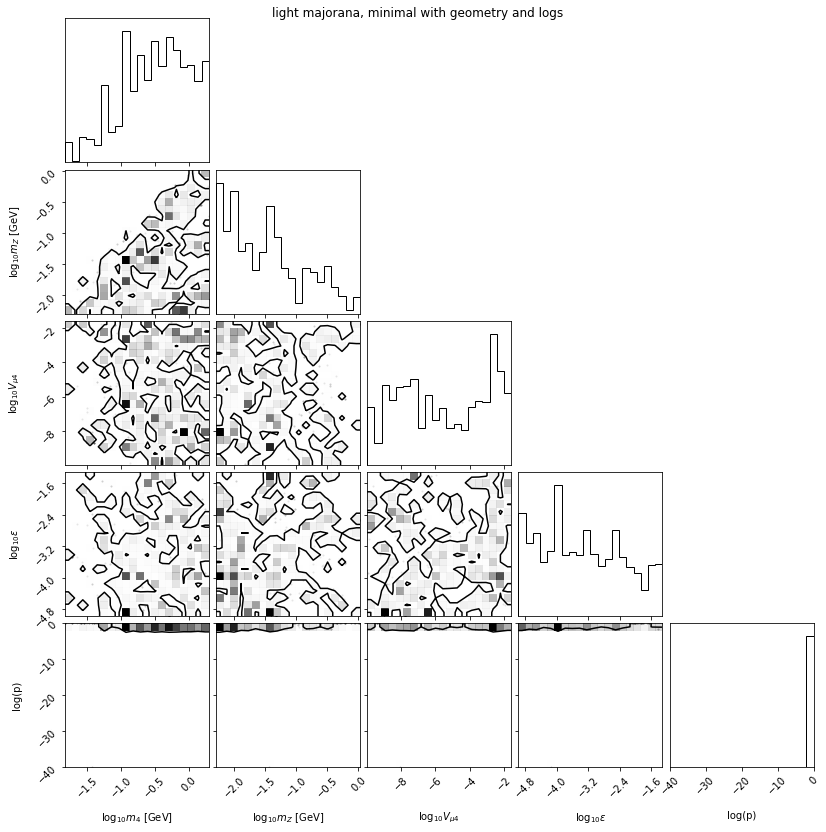

In [15]:
this_dark_nus_mcmc.corner_plot_raw(savefile='raw_corner')

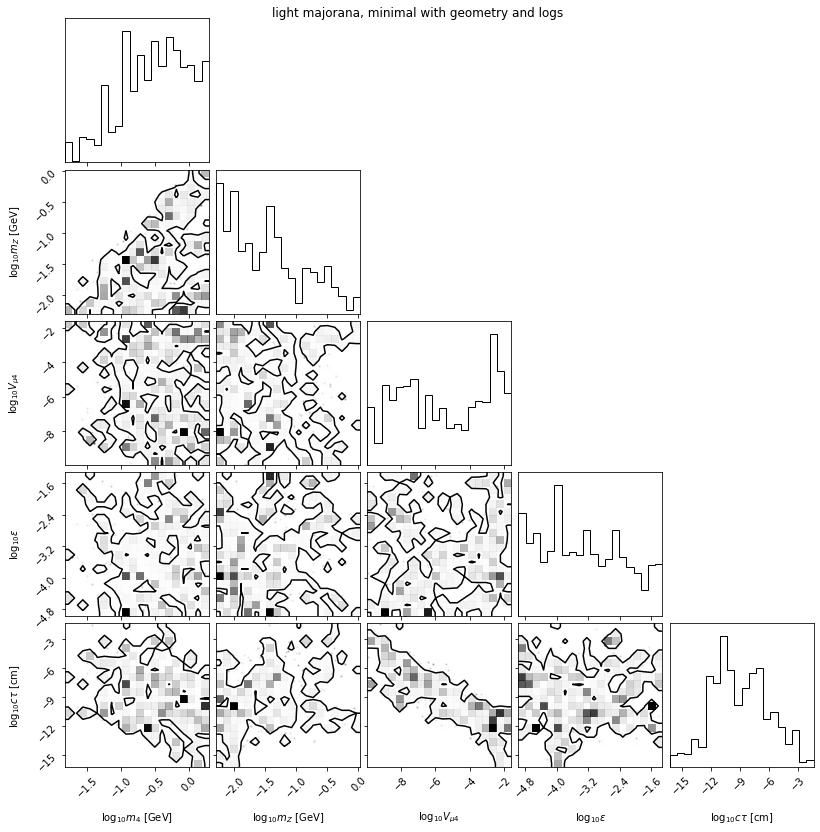

In [16]:
this_dark_nus_mcmc.corner_plot_physics(savefile='physics_corner')

In [17]:
print('Fraction of samples with null expectation =', (this_dark_nus_mcmc.samples['mu'] == 0).sum()/len(this_dark_nus_mcmc.samples))

Fraction of samples with null expectation = 0.981875


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:409: RuntimeWarning: invalid value encountered in subtract
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:763: RuntimeWarning: invalid value encountered in subtract
  return [self.samples[:, i] - means[i] for i in range(pars)]


Removed no burn in


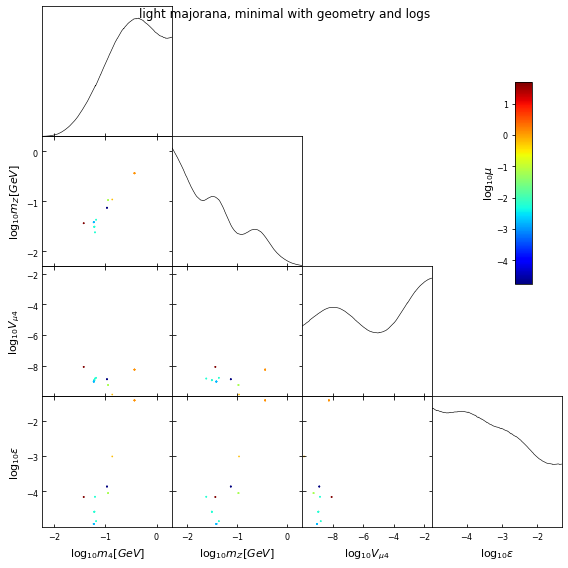

In [19]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_mu', savefile='corner_log10_mu')

In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_sigma/mu', savefile='corner_log10_sigma_mu')

/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:409: RuntimeWarning: invalid value encountered in subtract
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:763: RuntimeWarning: invalid value encountered in subtract
  return [self.samples[:, i] - means[i] for i in range(pars)]


Removed no burn in


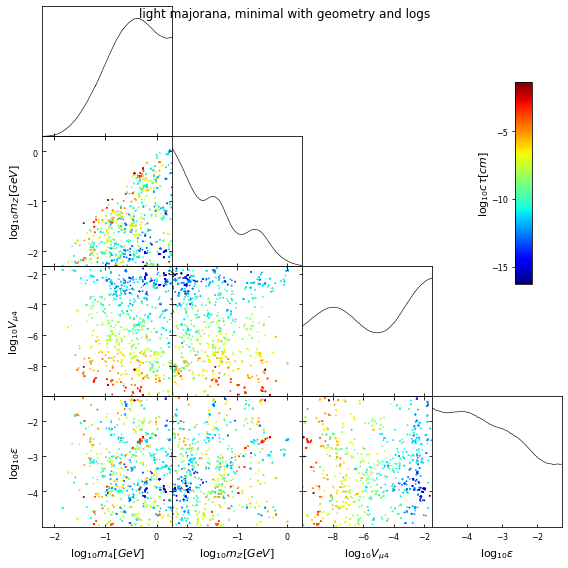

In [20]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_ctau', savefile='corner_log10_ctau')

/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:409: RuntimeWarning: invalid value encountered in subtract
  self.vars[i] = self.weights.dot((self.samples[:, i] - self.means[i]) ** 2) / self.norm
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/getdist/chains.py:763: RuntimeWarning: invalid value encountered in subtract
  return [self.samples[:, i] - means[i] for i in range(pars)]


Removed no burn in


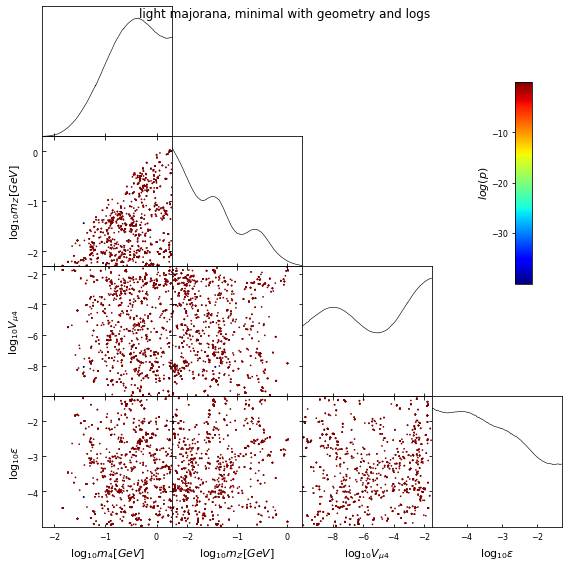

In [21]:
this_dark_nus_mcmc.corner_plot_with_colour('log(p)', savefile='corner_logp')